In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import layers
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [3]:
from sklearn.model_selection import train_test_split
train_images, x_val, train_labels, y_val = train_test_split(train_images,train_labels,test_size=0.2,shuffle=True)

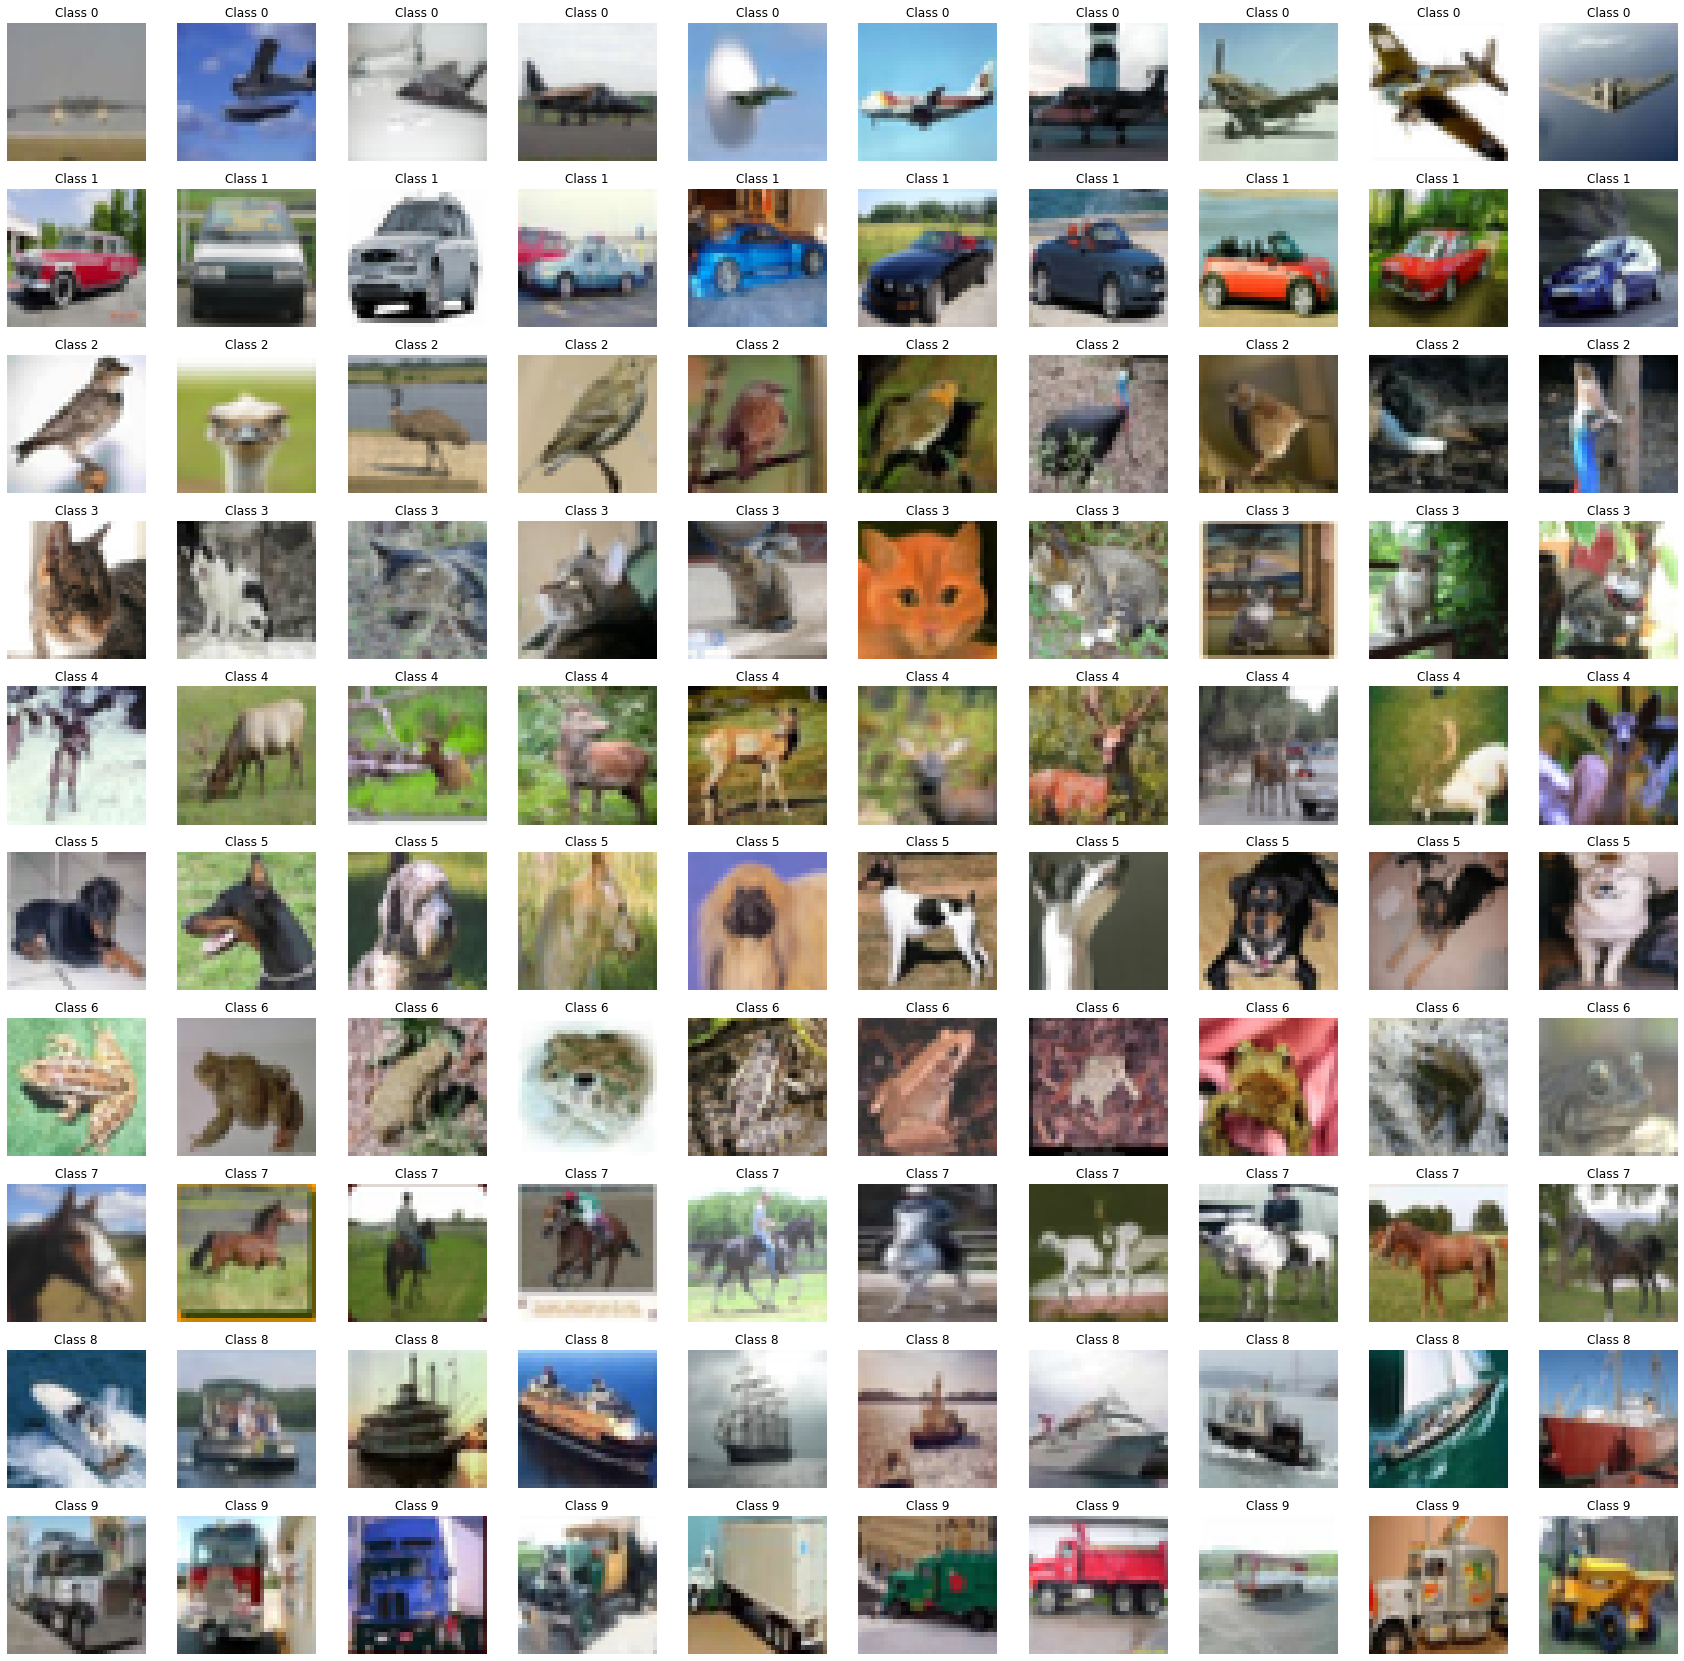

In [4]:
labels = np.unique(train_labels)
num_classes = len(labels)
examples_per_class = 10

# Create a figure with 10x10 subplots
fig, axes = plt.subplots(num_classes, examples_per_class, figsize=(30, 30))

for i in range(len(labels)):
    index = np.where(train_labels==labels[i])[0][:examples_per_class]
    class_images =train_images[index]
    
    for j in range(examples_per_class):
        axes[i, j].imshow(class_images[j])
        axes[i, j].axis('off') 
        axes[i, j].set_title(f'Class {i}' )

plt.show()

In [5]:
# we have 10 classes
num_classes

10

<Axes: ylabel='Count'>

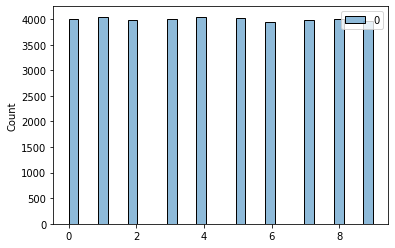

In [6]:
sns.histplot( train_labels )

<Axes: ylabel='Count'>

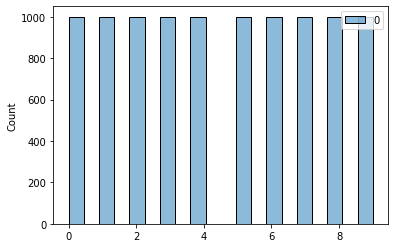

In [7]:
sns.histplot( test_labels)

In [8]:
train_images.shape

(40000, 32, 32, 3)

In [9]:
test_images.shape

(10000, 32, 32, 3)

In [10]:
x_val.shape

(10000, 32, 32, 3)

In [11]:
train_images.shape

(40000, 32, 32, 3)

In [12]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [13]:
train_labels.shape

(40000, 10)

In [14]:
y_val = to_categorical(y_val)

In [15]:
y_val.shape

(10000, 10)

In [16]:
#Train and test a model with 3 fully connected layers with the following architecture: 512-256-128
network = models.Sequential()
network.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32,3)))
network.add(layers.Conv2D(64, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))

network.add(layers.Conv2D(32, (3, 3), activation='relu'))
network.add(layers.Conv2D(32, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))

#network.add(layers.Conv2D(64, (3, 3), activation='relu'))

network.add(layers.Flatten())
network.add(layers.Dense(128 , activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

In [17]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        18464     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                    

In [18]:
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# from here we will add augmentation and transfer learning to our task

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming you have numpy arrays X_train and y_train for training data
# and X_val and y_val for validation data

train_datagen = ImageDataGenerator(rescale=1./255,
                                rotation_range=20,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)  # You can apply other data augmentation techniques here if needed
test_datagen = ImageDataGenerator(rescale=1./255,
                                rotation_range=20,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

# Create generators for training and validation data
train_generator = train_datagen.flow(
    x=train_images,
    y=train_labels,
    batch_size=20,
    shuffle=True  # Shuffle the data for training
)

validation_generator = test_datagen.flow(
    x=x_val,
    y=y_val,
    batch_size=20,
    shuffle=False  # Do not shuffle the data for validation
)


In [20]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 32, 32, 3)
labels batch shape: (20, 10)


In [21]:
history = network.fit(
      train_generator,
      steps_per_epoch=1500,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/20
1500/1500 [==============================] - 24s 14ms/step - loss: 1.7147 - accuracy: 0.3674 - val_loss: 1.4869 - val_accuracy: 0.4450
Epoch 2/20
1500/1500 [==============================] - 21s 14ms/step - loss: 1.4066 - accuracy: 0.4987 - val_loss: 1.3015 - val_accuracy: 0.5440
Epoch 3/20
1500/1500 [==============================] - 21s 14ms/step - loss: 1.2617 - accuracy: 0.5510 - val_loss: 1.2284 - val_accuracy: 0.5660
Epoch 4/20
1500/1500 [==============================] - 21s 14ms/step - loss: 1.1851 - accuracy: 0.5804 - val_loss: 1.1807 - val_accuracy: 0.5870
Epoch 5/20
1500/1500 [==============================] - 22s 14ms/step - loss: 1.1104 - accuracy: 0.6067 - val_loss: 1.1692 - val_accuracy: 0.6070
Epoch 6/20
1500/1500 [==============================] - 21s 14ms/step - loss: 1.0695 - accuracy: 0.6231 - val_loss: 1.0518 - val_accuracy: 0.6320
Epoch 7/20
1500/1500 [==============================] - 21s 14ms/step - loss: 1.0293 - accuracy: 0.6371 - val_loss: 1.0576 -

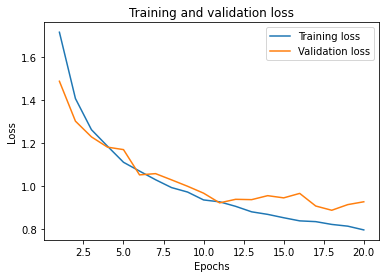

In [22]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [23]:
test_images1 = test_images

In [24]:
test_images = test_images.astype('float32') / 255

In [25]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.8054 - accuracy: 0.7273


In [26]:
print('test_acc:', test_acc)

test_acc: 0.7272999882698059


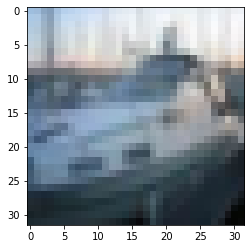

In [27]:
import matplotlib.pyplot as plt
img = test_images[2]
plt.imshow(np.reshape(img, (32,32,3)))

In [28]:
network.predict(np.reshape(img, ( 1, 32,32,3)))

1/1 [==============================] - 0s 192ms/step


array([[4.8394732e-02, 3.4832504e-01, 5.6326122e-04, 2.5470578e-04,
        3.9792256e-05, 6.7845627e-05, 5.4913049e-05, 2.9951245e-05,
        5.6226867e-01, 4.0001120e-02]], dtype=float32)

In [29]:
# it predicts label = 1
np.argmax(network.predict(np.reshape(img, (1,32,32,3))))

1/1 [==============================] - 0s 22ms/step


8

In [30]:
# the actual label = 8
np.argmax(test_labels[1])

8

# let's use transfer learning

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input

# Assuming you have numpy arrays X_train and y_train for training data
# and X_val and y_val for validation data

train_datagen = ImageDataGenerator(      preprocessing_function=preprocess_input,
                                #rescale=1./255, # we used the preprocessing of vgg so no need to scale
                                rotation_range=20,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)  # You can apply other data augmentation techniques here if needed
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                #rescale=1./255, we used the preprocessing of vgg so no need to scale
                                rotation_range=20,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

# Create generators for training and validation data
train_generator = train_datagen.flow(
    x=train_images,
    y=train_labels,
    batch_size=20,
    shuffle=True  # Shuffle the data for training
)

validation_generator = test_datagen.flow(
    x=x_val,
    y=y_val,
    batch_size=20,
    shuffle=False  # Do not shuffle the data for validation
)


In [36]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16 , ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
    
# Load pre-trained VGG16 model (excluding the top layer)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))



In [37]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [38]:
# Freeze the pre-trained layers so they are not trainable
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained base model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Train the model on your new dataset
history = model.fit(train_generator,
                    steps_per_epoch=1500,
                    epochs=15,
                    validation_data=validation_generator,
                    validation_steps=50)


Epoch 1/15
1500/1500 [==============================] - 23s 15ms/step - loss: 1.9563 - accuracy: 0.3934 - val_loss: 1.3379 - val_accuracy: 0.5420
Epoch 2/15
1500/1500 [==============================] - 25s 16ms/step - loss: 1.4274 - accuracy: 0.5046 - val_loss: 1.2782 - val_accuracy: 0.5490
Epoch 3/15
1500/1500 [==============================] - 25s 16ms/step - loss: 1.3342 - accuracy: 0.5408 - val_loss: 1.2537 - val_accuracy: 0.5750
Epoch 4/15
1500/1500 [==============================] - 30s 20ms/step - loss: 1.2825 - accuracy: 0.5633 - val_loss: 1.1706 - val_accuracy: 0.5800
Epoch 5/15
1500/1500 [==============================] - 26s 17ms/step - loss: 1.2390 - accuracy: 0.5817 - val_loss: 1.1966 - val_accuracy: 0.6000
Epoch 6/15
1500/1500 [==============================] - 28s 19ms/step - loss: 1.2254 - accuracy: 0.5843 - val_loss: 1.1594 - val_accuracy: 0.5920
Epoch 7/15
1500/1500 [==============================] - 30s 20ms/step - loss: 1.1973 - accuracy: 0.5956 - val_loss: 1.1428 -

In [39]:
for layer in base_model.layers:
    if 'block5_conv3' in layer.name:  # Assuming 'block5_conv3' is the last convolutional layer
        layer.trainable = True
    else:
        layer.trainable = False
        

# Train the model on your new dataset
history = model.fit(train_generator,
                    steps_per_epoch=1500,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=50)



Epoch 1/10
1500/1500 [==============================] - 25s 16ms/step - loss: 1.1026 - accuracy: 0.6257 - val_loss: 1.1135 - val_accuracy: 0.6140
Epoch 2/10
1500/1500 [==============================] - 25s 17ms/step - loss: 1.0914 - accuracy: 0.6299 - val_loss: 1.1167 - val_accuracy: 0.6210
Epoch 3/10
1500/1500 [==============================] - 26s 17ms/step - loss: 1.0840 - accuracy: 0.6333 - val_loss: 1.1412 - val_accuracy: 0.6150
Epoch 4/10
1500/1500 [==============================] - 26s 18ms/step - loss: 1.0832 - accuracy: 0.6344 - val_loss: 1.1125 - val_accuracy: 0.6160
Epoch 5/10
1500/1500 [==============================] - 30s 20ms/step - loss: 1.0819 - accuracy: 0.6330 - val_loss: 1.0246 - val_accuracy: 0.6300
Epoch 6/10
1500/1500 [==============================] - 27s 18ms/step - loss: 1.0695 - accuracy: 0.6389 - val_loss: 1.1654 - val_accuracy: 0.6090
Epoch 7/10
1500/1500 [==============================] - 25s 16ms/step - loss: 1.0536 - accuracy: 0.6425 - val_loss: 1.1079 -

In [40]:
test_images2 = preprocess_input(test_images1)

In [41]:
test_loss, test_acc = model.evaluate(test_images2, test_labels)

313/313 [==============================] - 6s 17ms/step - loss: 1.0498 - accuracy: 0.6548


In [42]:
print('test_acc:', test_acc)

test_acc: 0.6547999978065491


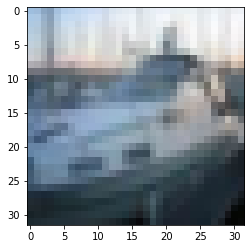

In [43]:
import matplotlib.pyplot as plt
img = test_images[2]
plt.imshow(np.reshape(img, (32,32,3)))

In [44]:
network.predict(np.reshape(img, ( 1, 32,32,3)))

1/1 [==============================] - 0s 22ms/step


array([[4.8394732e-02, 3.4832504e-01, 5.6326122e-04, 2.5470578e-04,
        3.9792256e-05, 6.7845627e-05, 5.4913049e-05, 2.9951245e-05,
        5.6226867e-01, 4.0001120e-02]], dtype=float32)

In [45]:
# it predicts label = 1
np.argmax(network.predict(np.reshape(img, (1,32,32,3))))

1/1 [==============================] - 0s 21ms/step


8

In [46]:
# the actual label = 8
np.argmax(test_labels[1])

8